In [1]:
%load_ext IPython.extensions.autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

def find_src_folder(current_path: Path, folder_name: str = 'src') -> Path:
    search_directories = [current_path] + list(current_path.parents)
    for parent in search_directories:
        if parent.name == folder_name:
            return parent.parent
    return current_path

src_path = find_src_folder(Path.cwd(), 'src')
sys.path.append(str(src_path))

# Análisis exploratorio (EDA) - Part 1
Dada la información extraída y almacenada en formato .parquet, se realiza un análisis exploratorio sobre la información recolectada

## Importación de librerias necesarias

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.utils import SparkUtils
from pyspark.sql import functions as F, types as T, DataFrame, Window
import json

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [52]:
from src.utils.visualization import plot_percentage_matrix_focus_category, plot_percentage_categories, \
    plot_percentage_categories_bar, plot_percentage_categories_bar_by_group, plot_boxplots_by_category, \
    plot_boxplot, plot_wordclouds
from src.utils.dataframe import check_null_values, check_empty_arrays

In [5]:
import os

In [6]:
spark_utils = SparkUtils('quality')

In [7]:
spark = spark_utils.spark

## Análisis información de productos

### Cargar información de items

In [13]:
meta_items = spark.read.format('delta').load(spark_utils.path('meta_items'))

In [14]:
meta_items.filter(F.size('description') == F.lit(0)).limit(1000).toPandas()

,title,main_category,features,description,average_rating,rating_number,price,store,parent_asin,categories,details,images
0,Microsoft Virtual PC for Mac 6.1 [Old Version],Software,[],[],3.0,7,NaN,Microsoft,B0000AI0NV,"[Software, Microsoft, All Microsoft]","{""Is Discontinued By Manufacturer"":""Yes"",""Lang...","[{""thumb"":""https://m.media-amazon.com/images/I..."
1,Made E-Z Deluxe Business Forms,Software,[],[],5.0,1,NaN,Made E-Z Software,1563827336,"[Software, Business & Office, Legal]","{""Is Discontinued By Manufacturer"":""No"",""Packa...","[{""thumb"":""https://m.media-amazon.com/images/I..."
2,Sibelius 4 Educational Edition,Software,"[Complete software for writing, playing, print...",[],3.0,4,NaN,Sibelius,B000B3Z2ZO,"[Software, Music, Instrument Instruction]","{""Package Dimensions"":""10.1 x 7.1 x 1.9 inches...","[{""thumb"":""https://m.media-amazon.com/images/I..."
3,DirectSystems Compatible with WIN 8.1 Compatib...,Software,[You are purchasing a custom Windows 8.1 Any V...,[],3.6,204,NaN,DirectSystems,B012URKXS4,"[Software, Utilities, Backup]","{""Is Discontinued By Manufacturer"":""No"",""Date ...","[{""thumb"":""https://m.media-amazon.com/images/I..."
4,Genuine Microsoft Windows 8 Pro X64 /64 Bit Li...,Software,[],[],4.5,7,NaN,Microsoft,B00EYNPY6O,"[Software, Microsoft, All Microsoft]","{""Is Discontinued By Manufacturer"":""No"",""Packa...","[{""thumb"":""https://m.media-amazon.com/images/I..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,AE WORDPERFECT OFFICE-2002 CD W9X/NT,Software,"[Voice-powered word processing, Web-ready slid...",[],3.4,4,99.99,Corel,B00006HT8W,"[Software, Corel, All Corel]","{""Is Discontinued By Manufacturer"":""Yes"",""Pack...","[{""thumb"":""https://m.media-amazon.com/images/I..."
996,SiteSpinner Pro: Professional Web Development ...,Software,[],[],3.1,128,NaN,Virtual Mechanics,B001PIAUEW,[],"{""Is Discontinued By Manufacturer"":""No"",""Packa...","[{""thumb"":""https://m.media-amazon.com/images/I..."
997,Ipswitch WS_FTP Pro V8 Single User,Software,[],[],4.5,3,NaN,"Ipswitch, Inc",B0000C66VY,[],"{""Is Discontinued By Manufacturer"":""No"",""Packa...","[{""thumb"":""https://m.media-amazon.com/images/I..."
998,Band-in-a-Box 2013 Everything Pak [Old Version],Software,[],[],5.0,1,NaN,PG Music Inc.,B00BY0G374,[],"{""Product Dimensions"":""9.88 x 3.38 x 6.25 inch...","[{""thumb"":""https://m.media-amazon.com/images/I..."


### Vista general de columnas disponibles

In [15]:
" | ".join( meta_items.columns )

'title | main_category | features | description | average_rating | rating_number | price | store | parent_asin | categories | details | images'

### Examinación de valores nulos en columnas

In [16]:
columns_data_nulls = []

for col in meta_items.columns:
    null_count, non_null_count, _ = check_null_values( meta_items, col)
    columns_data_nulls.append( (non_null_count, null_count, col) )
    print(
        f"""
        Columna: {col}
        Nulls: {null_count}
        Non-Null: {non_null_count}
        """
    )


        Columna: title
        Nulls: 0
        Non-Null: 3125022
        

        Columna: main_category
        Nulls: 231570
        Non-Null: 2893452
        

        Columna: features
        Nulls: 0
        Non-Null: 3125022
        

        Columna: description
        Nulls: 0
        Non-Null: 3125022
        

        Columna: average_rating
        Nulls: 25
        Non-Null: 3124997
        

        Columna: rating_number
        Nulls: 2959
        Non-Null: 3122063
        

        Columna: price
        Nulls: 2215374
        Non-Null: 909648
        

        Columna: store
        Nulls: 32379
        Non-Null: 3092643
        

        Columna: parent_asin
        Nulls: 0
        Non-Null: 3125022
        

        Columna: categories
        Nulls: 0
        Non-Null: 3125022
        

        Columna: details
        Nulls: 0
        Non-Null: 3125022
        

        Columna: images
        Nulls: 0
        Non-Null: 3125022
        


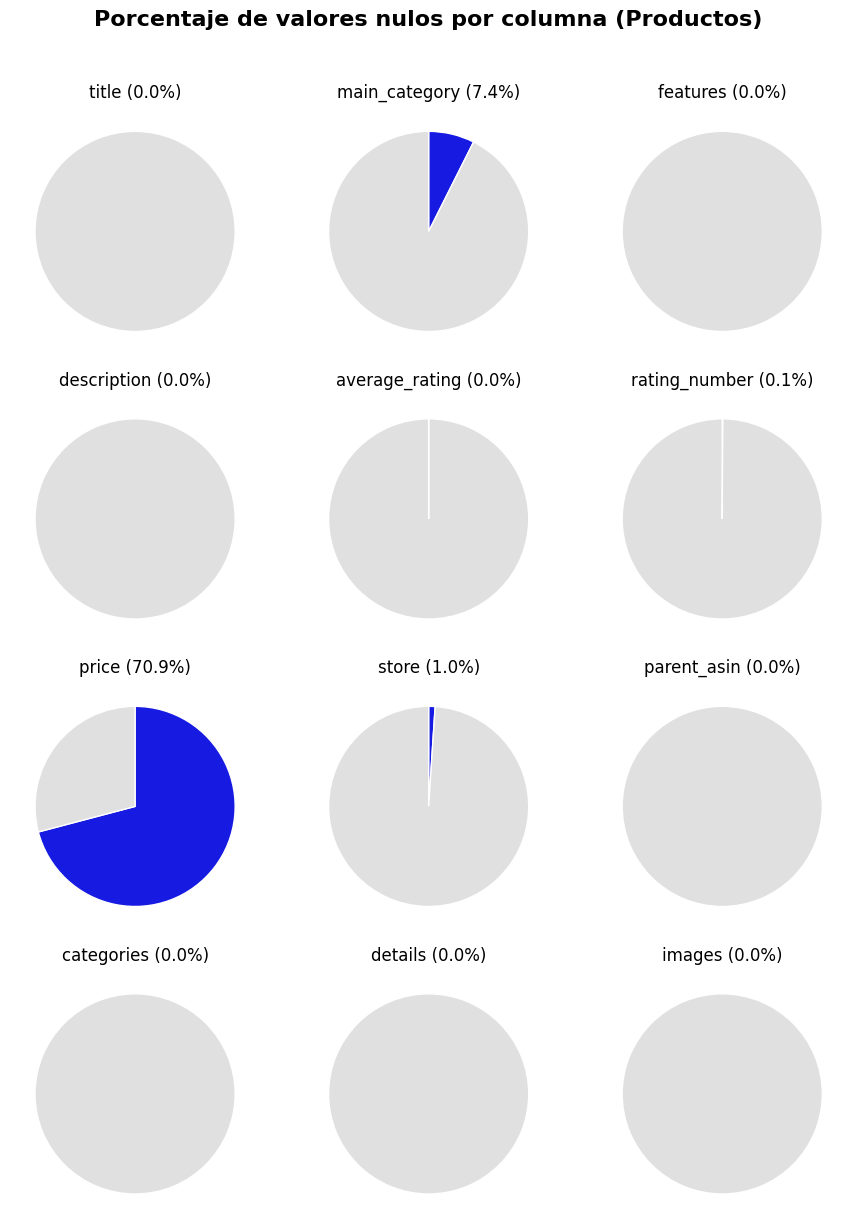

In [17]:
plot_percentage_matrix_focus_category(
    columns_data_nulls,
    title = "Porcentaje de valores nulos por columna (Productos)",
    target_index = 1, label_index = 2,
    target_color = "#171BE2"
)

### Examinación de tamaños de arreglo para campos que se encuentran en formato de arreglo

In [18]:
columns_data_empty = []

for col in [
    "features", "description", "categories", "images"
]:
    empty_count, non_empty_count, _ = check_empty_arrays( meta_items, col)
    columns_data_empty.append( (non_empty_count, empty_count, col) )
    print(
        f"""
        Columna: {col}
        Empties: {empty_count}
        Non-Empties: {non_empty_count}
        """
    )


        Columna: features
        Empties: 959572
        Non-Empties: 2165450
        

        Columna: description
        Empties: 1455879
        Non-Empties: 1669143
        

        Columna: categories
        Empties: 460892
        Non-Empties: 2664130
        

        Columna: images
        Empties: 2807
        Non-Empties: 3122215
        


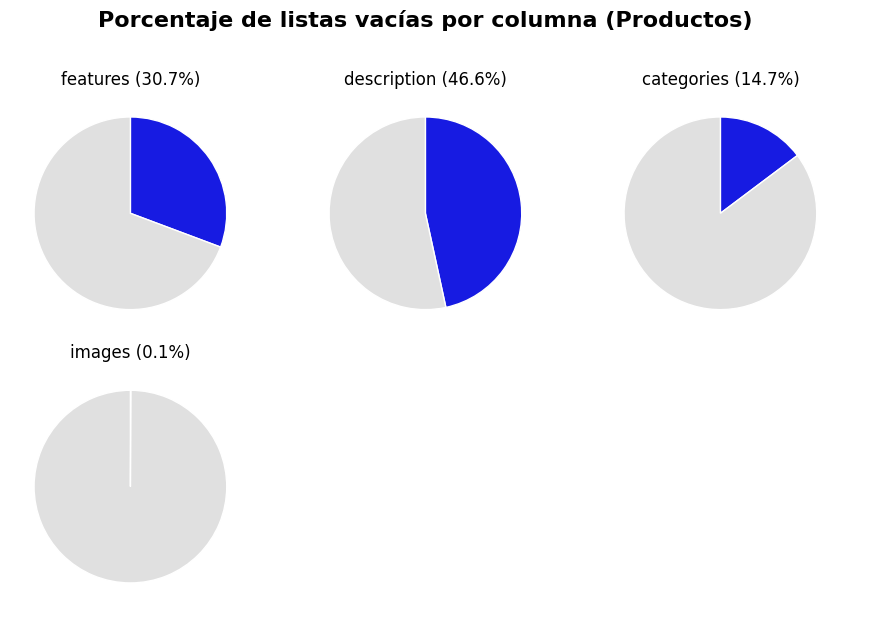

In [19]:
plot_percentage_matrix_focus_category(
    columns_data_empty,
    title = "Porcentaje de listas vacías por columna (Productos)",
    target_index = 1, label_index = 2,
    target_color = "#171BE2"
)

### Examinación de campo detalles

In [20]:
def get_json_length(str_obj):
    obj = json.loads(str_obj)
    return len(obj)

meta_items_json_length = (
    meta_items
        .select(
            F.col('*'), F.udf(get_json_length)(F.col('details')).alias('len')
        )
)

In [21]:
meta_items_details_empty = meta_items_json_length.filter(F.col('len') == 0).count()
meta_items_details_non_empty = meta_items_json_length.filter(F.col('len') > 0).count()

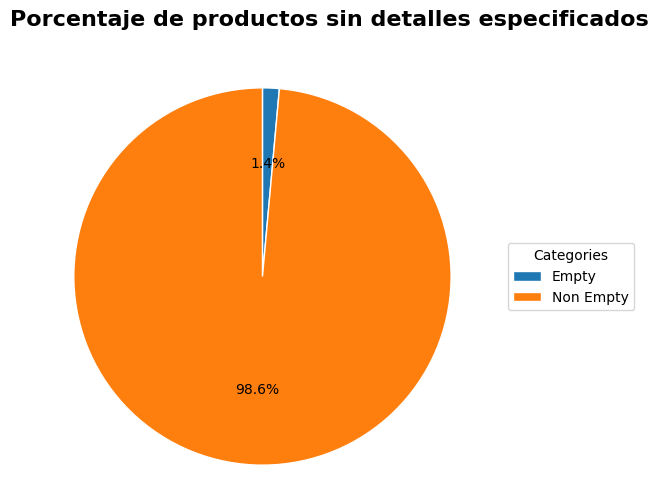

In [22]:
plot_percentage_categories(
    np.array([
        ('Empty', meta_items_details_empty),
        ('Non Empty', meta_items_details_non_empty),
    ]),
    title = "Porcentaje de productos sin detalles especificados",
    target_index = 1, label_index = 0,
)

In [23]:
f"Cantidad de items con campo details sin elementos: {meta_items_json_length.filter(F.col('len') == 0).count()}"

'Cantidad de items con campo details sin elementos: 44763'

Llaves principales usadas en el campo detalles

In [24]:
def get_json_keys(str_obj):
    obj : dict = json.loads(str_obj)
    keys = list(obj.keys())
    return keys

meta_items_json_keys = (
    meta_items
        .select(
            F.col('*'),
            F.explode(
                F.udf(
                    get_json_keys, T.ArrayType(T.StringType())
                )(F.col('details'))
            ).alias('item')
        )
)

In [25]:
meta_items_json_keys_counts = (
    meta_items_json_keys
        .groupBy('item')
        .agg(F.count('*'))
        .toPandas()
        .values
)

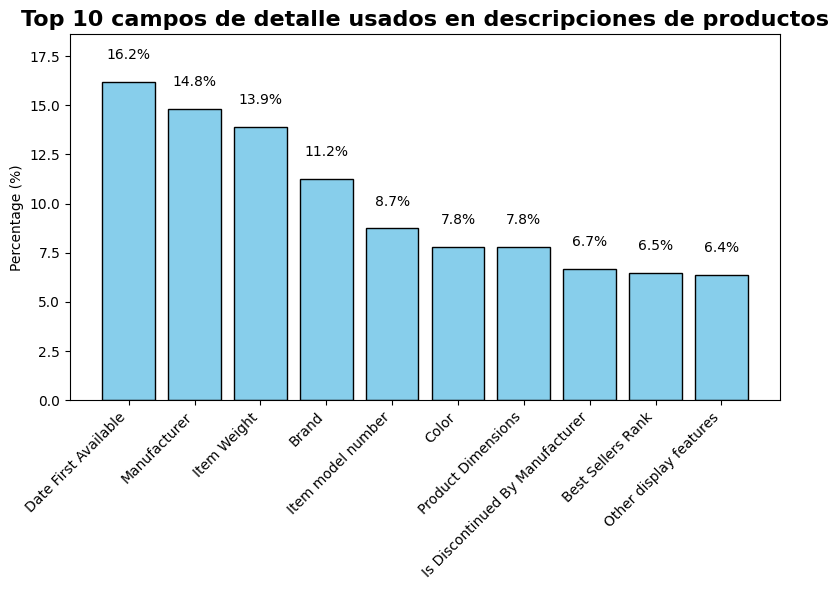

In [26]:
plot_percentage_categories_bar(
    meta_items_json_keys_counts, title="Top 10 campos de detalle usados en descripciones de productos",
    target_index = 1, label_index = 0
)

Distribución de campos de detalle por segundo nivel de categoría

In [27]:
meta_items_details_grouped_by_category = (
    meta_items_json_keys
        .groupBy('main_category', 'item')
        .agg(F.count('*').alias('item_count'))
)

meta_items_details_grouped_by_category_top = (
    meta_items_details_grouped_by_category
        .groupBy('main_category')
        .agg(F.sum('item_count').alias('category_count'))
        .withColumn(
            'category_count_rank',
            F.row_number().over(
                Window
                    .orderBy(F.col('category_count').desc())
            )
        )
        .filter(F.col('category_count_rank') <= 10)
)

meta_items_details_grouped_by_category_top_and_item = (
    meta_items_details_grouped_by_category.alias('A')
        .join(
            meta_items_details_grouped_by_category_top.alias('B'),
            (F.col('A.main_category') == F.col('B.main_category')),
            'inner'
        )
        .select(F.col('A.*'))
        .withColumn(
            'item_count_rank',
            F.row_number().over(
                Window
                    .partitionBy(F.col('main_category'))
                    .orderBy(F.col('item_count').desc())
            )
        )
        .filter(F.col('item_count_rank') <= 20)
)

In [28]:
meta_items_details_grouped_by_category_top_and_item_data = (
    meta_items_details_grouped_by_category_top_and_item
        .select(
            F.col('main_category'), F.col('item'), F.col('item_count')
        )
        .toPandas()
        .values
)

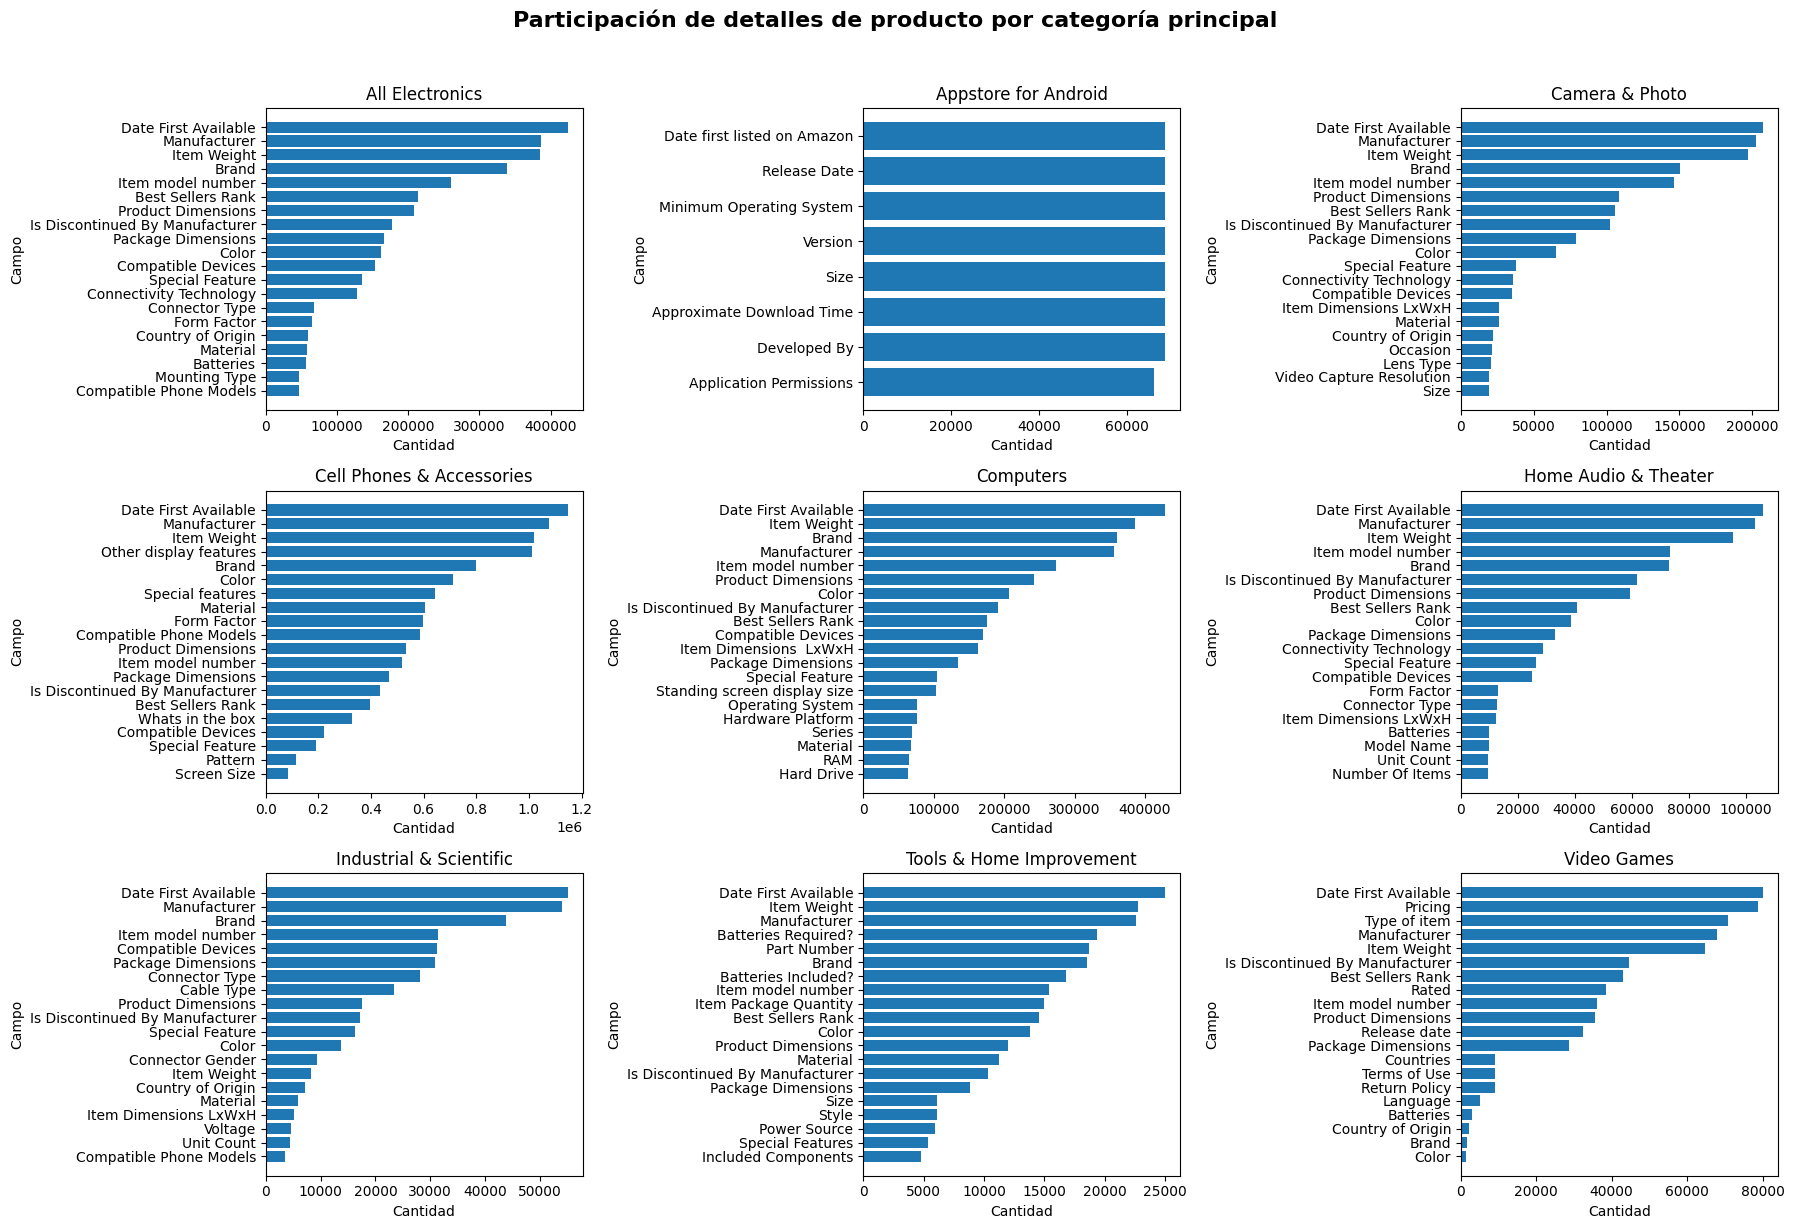

In [29]:
plot_percentage_categories_bar_by_group(
    meta_items_details_grouped_by_category_top_and_item_data,
    title = "Participación de detalles de producto por categoría principal",
)

## Análisis información de reseñas

### Cargar información de items

In [40]:
reviews = spark.read.format('delta').load(spark_utils.path('reviews'))

### Vista general de columnas disponibles

In [41]:
" | ".join( reviews.columns )

'rating | title | text | timestamp | helpful_vote | parent_asin | images'

### Examinación de valores nulos en columnas

In [42]:
columns_data_nulls_reviews = []

for col in reviews.columns:
    null_count, non_null_count, _ = check_null_values( reviews, col)
    columns_data_nulls_reviews.append( (non_null_count, null_count, col) )
    print(
        f"""
        Columna: {col}
        Nulls: {null_count}
        Non-Null: {non_null_count}
        """
    )


        Columna: rating
        Nulls: 0
        Non-Null: 74204685
        

        Columna: title
        Nulls: 0
        Non-Null: 74204685
        

        Columna: text
        Nulls: 0
        Non-Null: 74204685
        

        Columna: timestamp
        Nulls: 0
        Non-Null: 74204685
        

        Columna: helpful_vote
        Nulls: 0
        Non-Null: 74204685
        

        Columna: parent_asin
        Nulls: 0
        Non-Null: 74204685
        

        Columna: images
        Nulls: 0
        Non-Null: 74204685
        


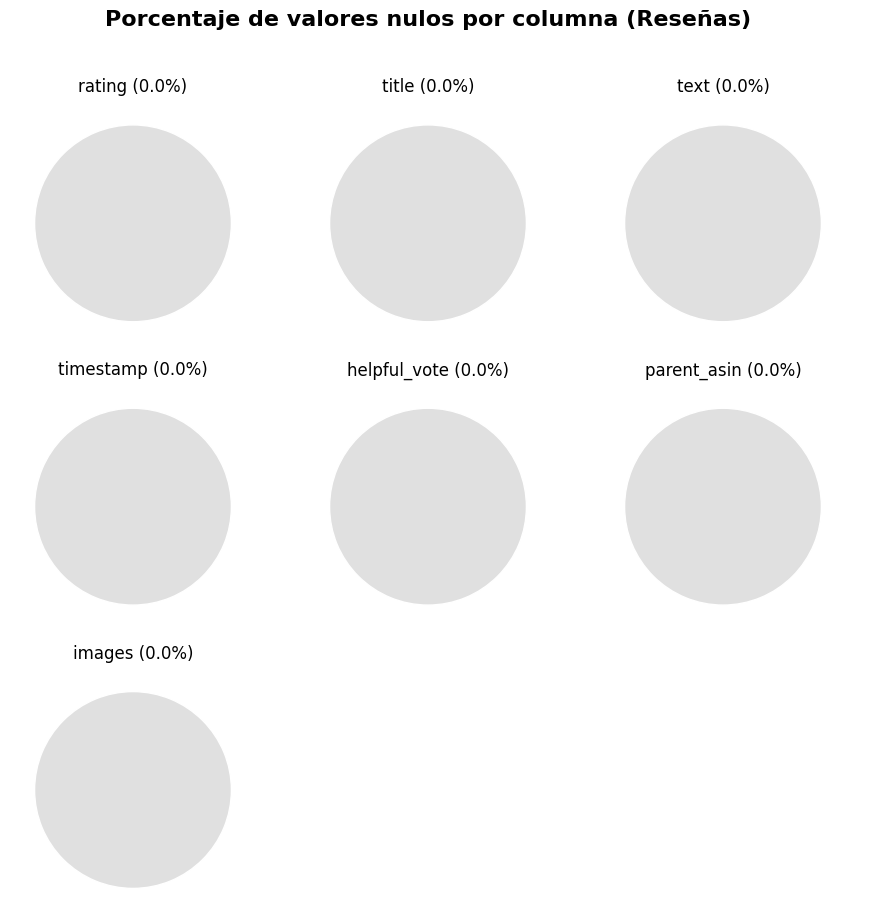

In [43]:
plot_percentage_matrix_focus_category(
    columns_data_nulls_reviews,
    title = "Porcentaje de valores nulos por columna (Reseñas)",
    target_index = 1, label_index = 2,
    target_color = "#171BE2"
)

In [44]:
columns_data_empty_reviews = []

for col in [
    "images"
]:
    empty_count, non_empty_count, _ = check_empty_arrays( reviews, col)
    columns_data_empty_reviews.append( (non_empty_count, empty_count, col) )
    print(
        f"""
        Columna: {col}
        Empties: {empty_count}
        Non-Empties: {non_empty_count}
        """
    )


        Columna: images
        Empties: 70927443
        Non-Empties: 3277242
        


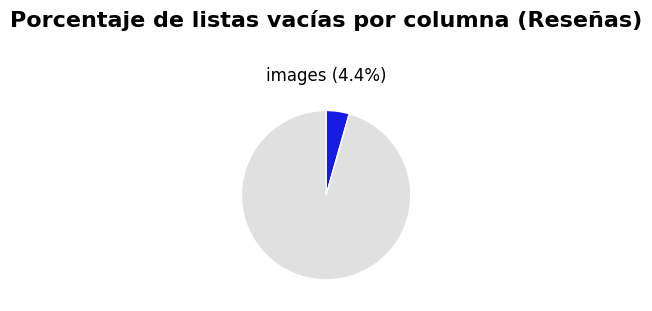

In [45]:
plot_percentage_matrix_focus_category(
    columns_data_empty_reviews,
    title = "Porcentaje de listas vacías por columna (Reseñas)",
    target_index = 0, label_index = 2,
    target_color = "#171BE2"
)

### Distribución de puntuación

In [46]:
reviews_with_products = (
    reviews.alias('A')
        .join(
            meta_items.alias('B'),
            F.col('A.parent_asin') == F.col('B.parent_asin')
        )
        .select(
            F.col('A.rating'), F.col('A.title').alias('review_title'),
            F.col('A.text').alias('review_text'), F.col('A.timestamp'),
            F.col('A.helpful_vote'),
            'B.*',
        )
)

In [47]:
reviews_with_categories = (
    reviews_with_products
        .agg(
            F.min('rating').alias('min_rating'),
            F.max('rating').alias('max_rating'),
            F.mean('rating').alias('mean_rating'),
            F.std('rating').alias('std_rating'),
        )
        .toPandas()
        .values
)

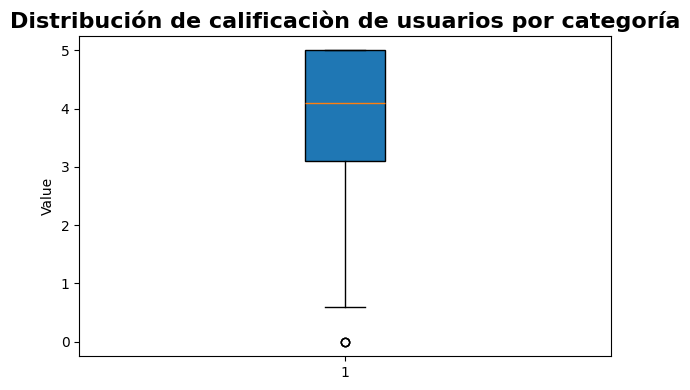

In [50]:
plot_boxplot(
    reviews_with_categories,
    title = 'Distribución de calificaciòn de usuarios por categoría'
)